# LAB-2 #2

### *Heart Disease Classification using Naive Bayes*

<img height = 200 width = 200 src = 'https://media1.tenor.com/images/da227072f6fa6f81fcb0ecc5c04b6a0b/tenor.gif'>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing  
from sklearn import metrics
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Getting our Data

In [2]:
df = pd.read_csv('../Dataset/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data Preprocessing

In [3]:
# checking for null values
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# checking variance
variables = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,38.998305,age
1,3.523211,sex
2,2.414403,cp
3,58.557335,trestbps
4,26.267365,chol
5,1.268205,fbs
6,2.058206,restecg
7,42.742178,thalach
8,2.022527,exang
9,3.062890,oldpeak


In [6]:
# dropping all columns having vif>10
df = df.drop(['age', 'trestbps', 'chol', 'thalach', 'slope', 'thal'], axis = 1)
df

,sex,cp,fbs,restecg,exang,oldpeak,ca,target
0,1,3,1,0,0,2.3,0,1
1,1,2,0,1,0,3.5,0,1
2,0,1,0,0,0,1.4,0,1
3,1,1,0,1,0,0.8,0,1
4,0,0,0,1,1,0.6,0,1
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,0,0
299,1,3,0,1,0,1.2,0,0
300,1,0,1,1,0,3.4,2,0
301,1,0,0,1,1,1.2,1,0


In [7]:
# removing all outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,sex,cp,fbs,restecg,exang,oldpeak,ca,target
0,1,3,1,0,0,2.3,0,1
1,1,2,0,1,0,3.5,0,1
2,0,1,0,0,0,1.4,0,1
3,1,1,0,1,0,0.8,0,1
4,0,0,0,1,1,0.6,0,1
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,0,0
299,1,3,0,1,0,1.2,0,0
300,1,0,1,1,0,3.4,2,0
301,1,0,0,1,1,1.2,1,0


### Data Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

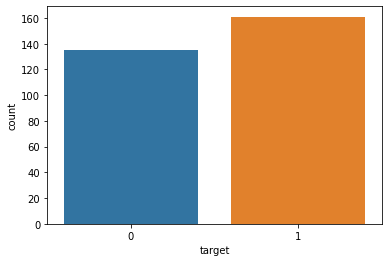

In [8]:
# checking the distribution of outcomes
sns.countplot(x = 'target', data = df)

<AxesSubplot:>

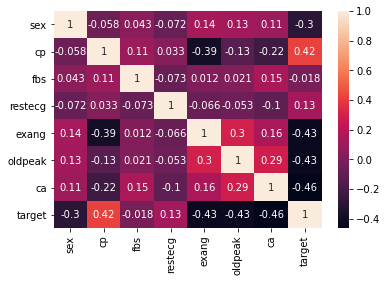

In [9]:
# using Pearson's correlation for quantifying the relationship
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True)

### Splitting Data for Training and Testing

In [10]:
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)  # splitting in the ratio 70:30

### Making Predictions using Naive Bayes

In [11]:
classifier = GaussianNB()
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

# Accuracy
print('Accuracy:', classifier.score(X_test, y_test))

Accuracy: 0.8089887640449438


# Predictions are 80.89% accurate.

### Results' Visualization

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[32, 12],
       [ 5, 40]], dtype=int64)

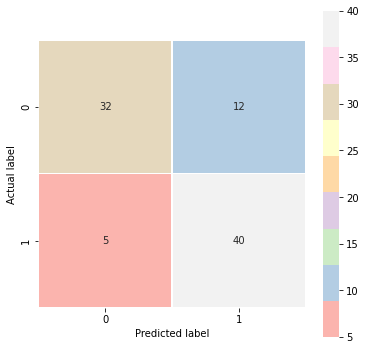

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Classification Report

In [14]:
class_names = ['Weak[0]','Strong[1]']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     Weak[0]       0.86      0.73      0.79        44
   Strong[1]       0.77      0.89      0.82        45

    accuracy                           0.81        89
   macro avg       0.82      0.81      0.81        89
weighted avg       0.82      0.81      0.81        89

